In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

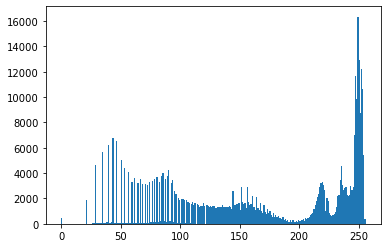

In [3]:
img = cv2.imread('home.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


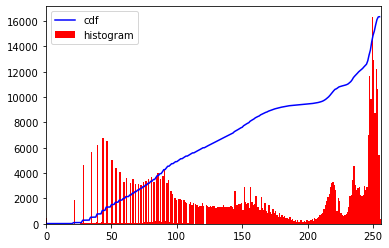

In [6]:
img = cv2.imread('home.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [7]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x18efb7038e0>)

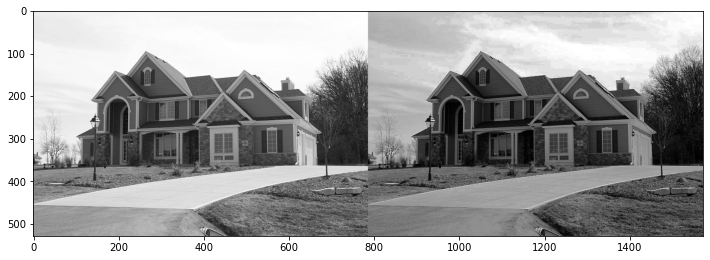

In [9]:
img = cv2.imread('home.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.figure(figsize = (12,8))
plt.subplot(111),plt.imshow(res,'gray')